---

# Lecture 9.1 Ensemble Methods

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RandyRDavila/Data_Science_and_Machine_Learning_Spring_2022/blob/main/Lecture_9/Lecture_9_1.ipynb)

**Ensemble methods** are machine learning methods that aggregate the predictions of a group of base learners in order to form a single learning model. For example, imagine that each person in this [video](https://www.youtube.com/watch?v=iOucwX7Z1HU&t=203s) is a trained machine learning model and notice the average of their predictions is a much more accurate prediction that the individual predictions. In this lecture we will consider three types of ensemble concepts and methods. Namely, 
1. **Hard Voting**

2. **Bagging**

3. **Random Forests**

In the rest of this notebook we explore these concepts. 

---



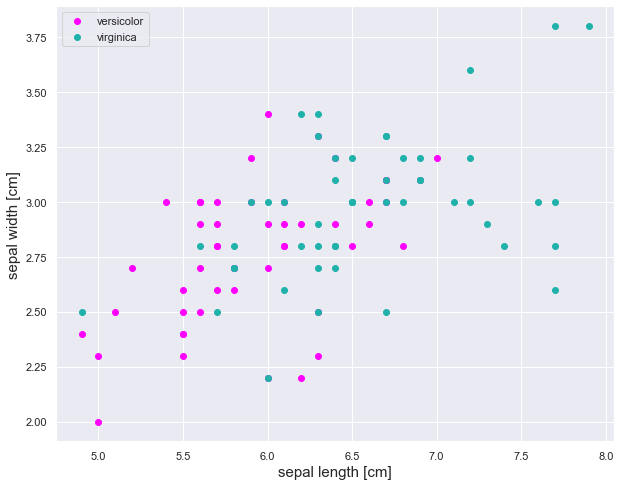

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
iris = sns.load_dataset("iris")
iris = iris.iloc[50:]

X = iris[["sepal_length", "sepal_width"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "versicolor":
        return 0
    else:
        return 1
         
# Create target value array
y = iris["species"].map(make_labels).to_numpy()

# Plot the data
flowers = ["versicolor", "virginica"]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(flowers, colors):
    temp_df = iris[iris.species == species]
    ax.scatter(temp_df.sepal_length,
               temp_df.sepal_width,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("sepal length [cm]", fontsize = 15)
ax.set_ylabel("sepal width [cm]", fontsize = 15)
ax.legend()
plt.show()

In [4]:
# import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# import ensemble method 
from sklearn.ensemble import VotingClassifier

# split training data 
from sklearn.model_selection import train_test_split

# import metric 
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 9)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
        estimators=[("lr", log_clf), ("rf", rnd_clf), ("svm", svm_clf)],
        voting = "hard"
    )

svm_clf.fit(X_train, y_train)
svm_y_predict = svm_clf.predict(X_test)
print(f"svm accuracy: {accuracy_score(y_test, svm_y_predict)}")

log_clf.fit(X_train, y_train)
log_y_predict = log_clf.predict(X_test)
print(f"logistic regression accuracy: {accuracy_score(y_test, log_y_predict)}")

rnd_clf.fit(X_train, y_train)
rnd_y_predict = rnd_clf.predict(X_test)
print(f"random forest accuracy: {accuracy_score(y_test, rnd_y_predict)}")

voting_clf.fit(X_train, y_train)
y_predict = voting_clf.predict(X_test)
print(f"voting classifier accuracy: {accuracy_score(y_test, y_predict)}")

svm accuracy: 0.75
logistic regression accuracy: 0.7
random forest accuracy: 0.55
voting classifier accuracy: 0.75


---

## 9.1.1 Bagging

<img src="Bootstrapping.png" alt="Drawing" style="width: 500px;"/>

The term **bagging** referes to **b**ootstrap **agg**regating. **Bootstrapping** is a method of inferring results for a population from results found on a collection of smaller random samples of that population, using replacement during the sampling process. In the context of machine learning, a given set of machine learning model is trained respectively on random samples of training data with replacement (see the above figure), then the combined predictions of each model is **aggregated** and used as a single prediction. For regression tasks this would mean taking the average of the set of model prediction, and for classification taking the majority vote.  

Generally speaking, the models we pick for ensembling will be "dumb learners", meaning models that are barely superior to randomly guessing. Individually the models will perform poorly, but collectively will perform well. 

But why is bagging useful? According to this [article](https://towardsdatascience.com/random-forests-algorithm-explained-with-a-real-life-example-and-some-python-code-affbfa5a942c):

> "Each model is trained on a different dataset, because they’re bootstrapped. So inevitably, each model will make different mistakes, and have a distinct error and variance. Both the error and variance get reduced in the aggregation step where, literally in the case of Regression, they are averaged out."

The key idea here is the reduction in variance of the model. Again, from the above article:

> "In a Regression task you can calculate actual variance of the prediction compared to the true targets. If the tree produces results that are too far off from its true targets, it has high-variance and therefore, it is overfit."

To illustrate this concept we will once again consider the iris dataset; and compare the performance between a single decision tree model and a bagging classifier of many depth 1 decision trees, referred to as *decision stumps*. Run the following code cell to load the iris dataset and visualize the data. 



---

----

As you can tell, no one model would ever hope to learn seperation on this dataset. Let us next compare a decision tree. 



----

In [5]:
# import metrics
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 6)

stump_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
stump_clf.fit(X_train, y_train)
stump_y_pred = stump_clf.predict(X_test)
print(f"Stump Classification Report")
print(classification_report(y_test, stump_y_pred), "\n")


tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

Stump Classification Report
              precision    recall  f1-score   support

           0       0.57      1.00      0.73        20
           1       1.00      0.25      0.40        20

    accuracy                           0.62        40
   macro avg       0.79      0.62      0.56        40
weighted avg       0.79      0.62      0.56        40
 

Tree Classification Report
              precision    recall  f1-score   support

           0       0.64      0.45      0.53        20
           1       0.58      0.75      0.65        20

    accuracy                           0.60        40
   macro avg       0.61      0.60      0.59        40
weighted avg       0.61      0.60      0.59        40
 



In [6]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.86      0.90      0.88        20

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.87        40
 



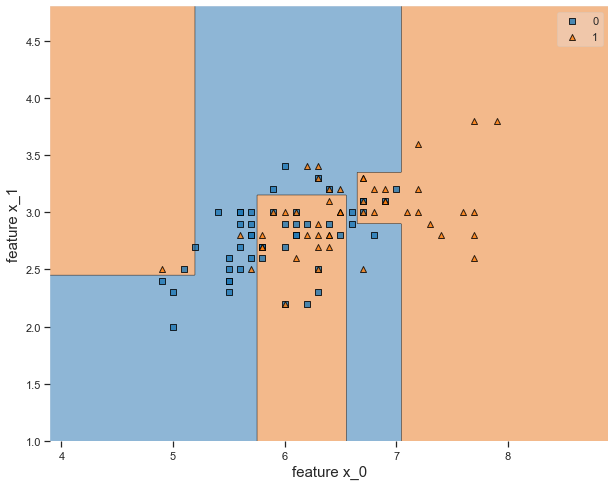

In [7]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

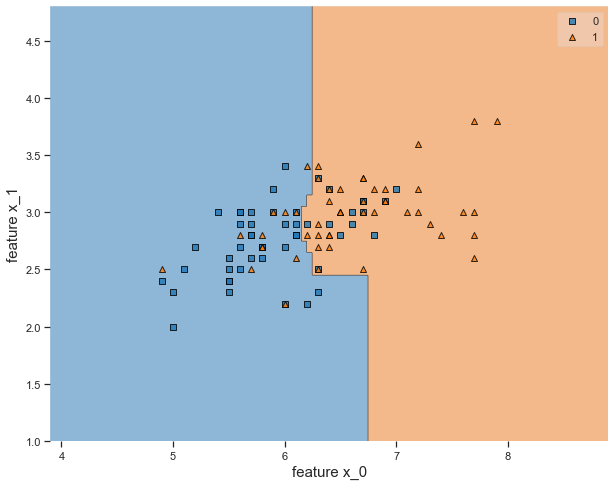

In [8]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

----

## Random Forests 
Technically speaking, the above bagging model is called a **Random forest**. Such a model exists inside the ```sklearn.ensemble``` module, and is the ```DecisionTreeClassifier``` class. However, the random forest algorithm used in training the ```RandomForestClassifier``` class introduces extra randomness when growing trees; instead of searching for the best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater diversity of trees which results in even lower variance of the fit model. 

Run the following code cell and compare the three models. 


----

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 5)


tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")



Tree Classification Report
              precision    recall  f1-score   support

           0       0.52      0.59      0.55        22
           1       0.40      0.33      0.36        18

    accuracy                           0.48        40
   macro avg       0.46      0.46      0.46        40
weighted avg       0.47      0.47      0.47        40
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.67      0.27      0.39        22
           1       0.48      0.83      0.61        18

    accuracy                           0.53        40
   macro avg       0.58      0.55      0.50        40
weighted avg       0.58      0.53      0.49        40
 



In [10]:
forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.67      0.27      0.39        22
           1       0.48      0.83      0.61        18

    accuracy                           0.53        40
   macro avg       0.58      0.55      0.50        40
weighted avg       0.58      0.53      0.49        40
 



---

As obserbed in the output of the above code cell, the accuracy of the bagging classifier with decision stumps and the random forest are the same. However, in theory the random forest model will have less variance than the random forest. Another way we can compare these two models with identical accuracy is to view the decision regions generated by the. Let's next do this by running the following three code cells. 



---

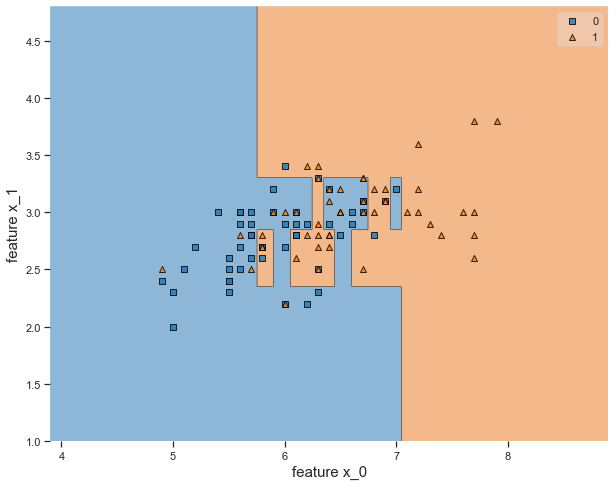

In [11]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

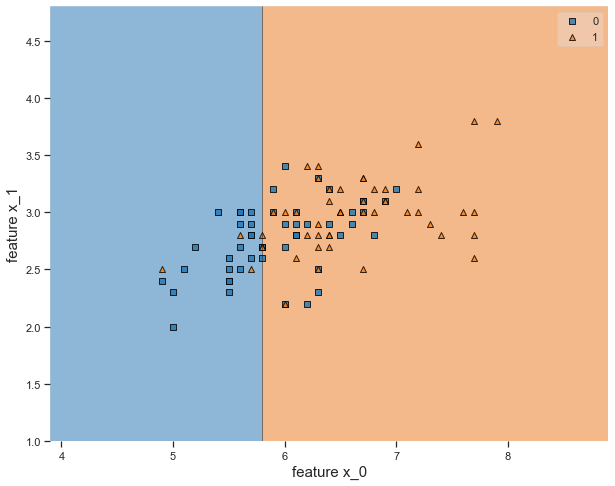

In [12]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

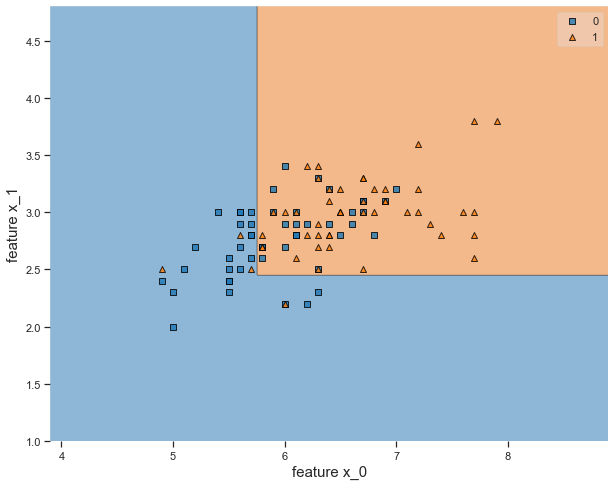

In [13]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

---

It may be the case that we can improve the performance of all three models by considering more features in the dataset. With this in mind, let's consider these three models on all 4 features of the dataset. This can be done by running the following code cell. 



---

In [15]:
from sklearn.ensemble import RandomForestClassifier

X = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 5)



tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=2),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.94      0.89      0.91        18

    accuracy                           0.93        40
   macro avg       0.93      0.92      0.92        40
weighted avg       0.93      0.93      0.92        40
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.94      0.89      0.91        18

    accuracy                           0.93        40
   macro avg       0.93      0.92      0.92        40
weighted avg       0.93      0.93      0.92        40
 



In [16]:
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.94      0.89      0.91        18

    accuracy                           0.93        40
   macro avg       0.93      0.92      0.92        40
weighted avg       0.93      0.93      0.92        40
 



In [18]:
forest_clf = RandomForestClassifier(max_depth = 3, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.94      0.89      0.91        18

    accuracy                           0.93        40
   macro avg       0.93      0.92      0.92        40
weighted avg       0.93      0.93      0.92        40
 



---

## Feature Importance 

One cool thing about random forests is that these models make it simple to measure feature importance of each feature. Scikit-Learn does this by measuring a feature's importance by looking at how much the tree nodes that use that feature reduce impurity on average across all trees in the forest. For example, consider running the following code cell. 


---

In [19]:
names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

sepal_length 0.10364376753560448
sepal_width 0.010066203641659376
petal_length 0.4300969735948328
petal_width 0.4561930552279034
